## Logistic Regression

https://www.kaggle.com/vishalyo990/titanic-dataset-logistic-regression-and-eda?select=train.csv

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
train = pd.read_csv('C:\\Users\\Dr Vandana\\Downloads\\train.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

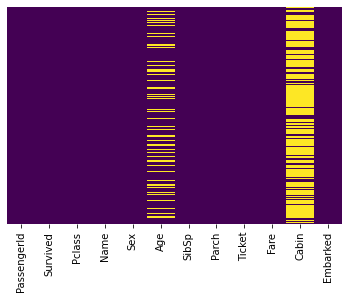

In [ ]:
#Lets do some exploratory data analysis.

#Lets find out the missing data in our data set
#This heatmap shows the null values in yellow line.

sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

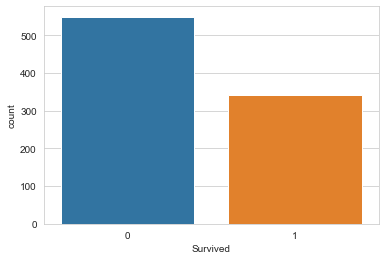

In [ ]:
#EDA
#Lets see how many of survived andd how many of not.
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

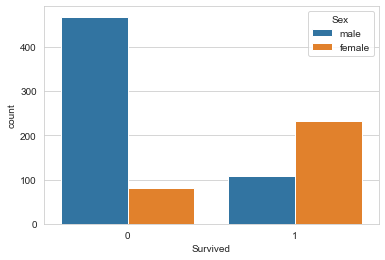

In [ ]:
#Lets see this survival rate as per sex.
sns.countplot(x = 'Survived', data = train, hue = 'Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

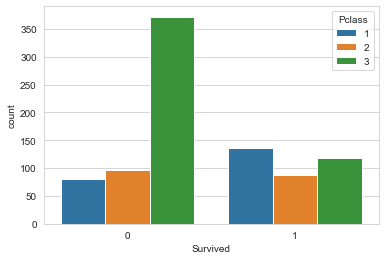

In [ ]:
#Now the survival rate as per of Pclass
#Here we see the the passenger are in 3rd clas are more likely to not survived.
sns.countplot(x = 'Survived', data = train, hue = 'Pclass')

C:\Users\Dr Vandana\Anaconda3\envs\Experiment\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

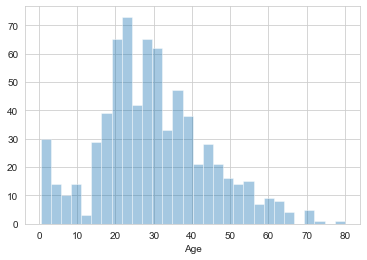

In [ ]:
#Lets see distribution of age in the dataset
#Here we see that more number of peoples as of the young age between 20 to 30
sns.distplot(train['Age'].dropna(), kde = False, bins = 30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

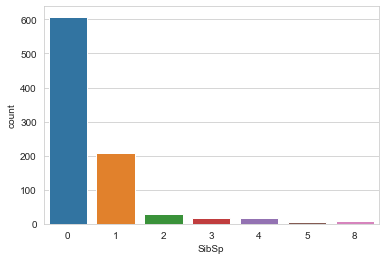

In [ ]:
#Lets look at the sibling and spouse column
sns.countplot(x = 'SibSp', data = train)

<AxesSubplot:>

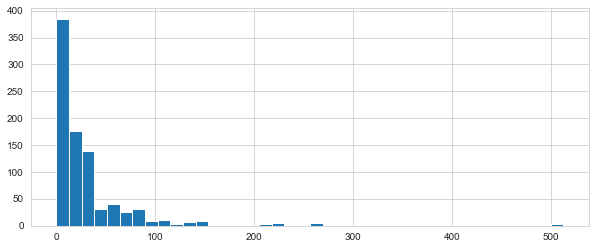

In [ ]:
#Now lets explore the fair column
train['Fare'].hist(bins = 40, figsize=(10,4))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

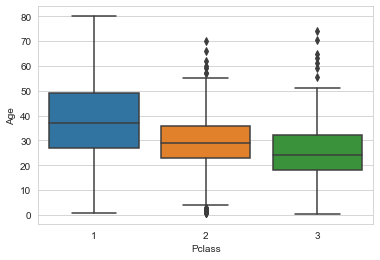

In [ ]:
#Now lets deal with the missing data.
#Filling the age as the mean of the present ages.
#Lets do it the smart way by considering Pclass.
sns.boxplot(x = 'Pclass', y='Age', data = train)

In [ ]:
#Now impute the age as considering the Pclass
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [ ]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

<AxesSubplot:>

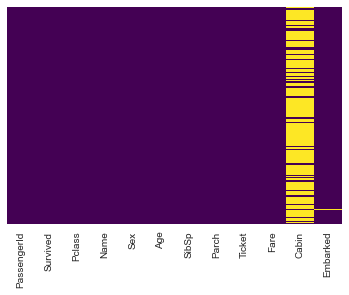

In [ ]:
#Now lets check our data.
#We see that our data is sucessfully filled the age values.
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap="viridis")

<AxesSubplot:>

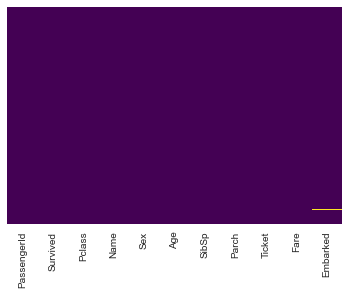

In [ ]:
#Now lets drop the coloumn Cabin because it has high number of missing valus.
train.drop('Cabin', axis = 1, inplace = True)
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap="viridis")

#Now our data is free from missing values as the plot showing one solid color only.

In [ ]:
#Now lets create dummy varibles for the categorical columns.
sex = pd.get_dummies(train['Sex'],drop_first = True)

In [ ]:
embark = pd.get_dummies(train['Embarked'],drop_first = True)

In [ ]:
#lets join the two dummies we have make in our original dataset
train = pd.concat([train, sex, embark], axis = 1)

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,0,0


In [ ]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace = True)

In [ ]:
#Now we see that our dataset is good for performing machine learning algorithms.
#We have now all numerical columns

train.drop(['PassengerId'], axis=1, inplace = True)

In [ ]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
#Now lets train our model to do predictions.
#For that first we need to divide our data set in two datasets
X=train.drop('Survived', axis = 1)
y= train['Survived']

In [ ]:
!pip install sklearn

In [ ]:
!pip install sklearn
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3, random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#Lets create a instance of LogisticRegression
logmodel = LogisticRegression()

In [ ]:
#Lets fit a model first
logmodel.fit(X_train, y_train)

C:\Users\Dr Vandana\Anaconda3\envs\Experiment\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [ ]:
#Lets do predictions
predictions = logmodel.predict(X_test)

In [ ]:
#we have predict our predictions now.
#Lets check the classification report of our predictions
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       154
           1       0.78      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[133,  21],
       [ 38,  76]], dtype=int64)

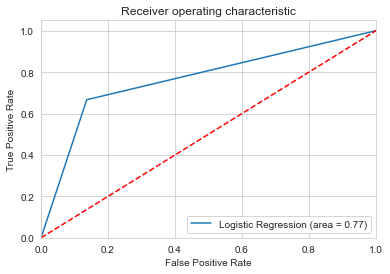

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

###  Interpritation

**Precision:**

Precision tells us the proportion of correctly predicted positive cases out of all cases predicted as positive. In our case, for the "0" class (meaning passengers who did not survive), the precision is 0.78, which means that out of all the passengers predicted as not surviving, 78% actually did not survive. For the "1" class (meaning passengers who survived), the precision is 0.78, indicating that out of all the passengers predicted as surviving, 78% actually survived.

**Recall:**

Recall, also known as sensitivity, tells us the proportion of correctly predicted positive cases out of all actual positive cases. For the "0" class, the recall is 0.86, meaning that out of all the passengers who did not survive, 86% were correctly identified as not surviving. For the "1" class, the recall is 0.67, indicating that out of all the passengers who survived, 67% were correctly identified as surviving.


**Support:**

Support refers to the number of actual occurrences of each class in the dataset. In our case, there were 154 instances of passengers not surviving (class "0") and 114 instances of passengers surviving (class "1").

**Accuracy:**

Accuracy tells us the proportion of correctly classified cases out of all cases. In our model, the accuracy is 0.78, meaning that 78% of all predictions were correct.


**F1-score**

- The F1-score is a metric that combines both precision and recall into a single value. It's useful because it gives us a way to balance both precision and recall in one number.

- Precision focuses on the accuracy of positive predictions. It tells us how many of the predicted positive cases were actually positive.

- Recall, on the other hand, focuses on the ability of the model to find all the positive cases. It tells us how many of the actual positive cases were found by the model.

- The F1-score is calculated using the mean of precision and recall.

**Obervations:**
- For the "0" class (passengers who did not survive), the F1-score is 0.82. This means that the model has a good balance between precision and recall for predicting passengers who did not survive.

- For the "1" class (passengers who survived), the F1-score is 0.72. This indicates that the balance between precision and recall for predicting passengers who survived is slightly lower compared to the "0" class.